# UNIVERSIDAD POLITECNICA SALESIANA



## Alumna: Narcisa Araujo


## Busqueda A*

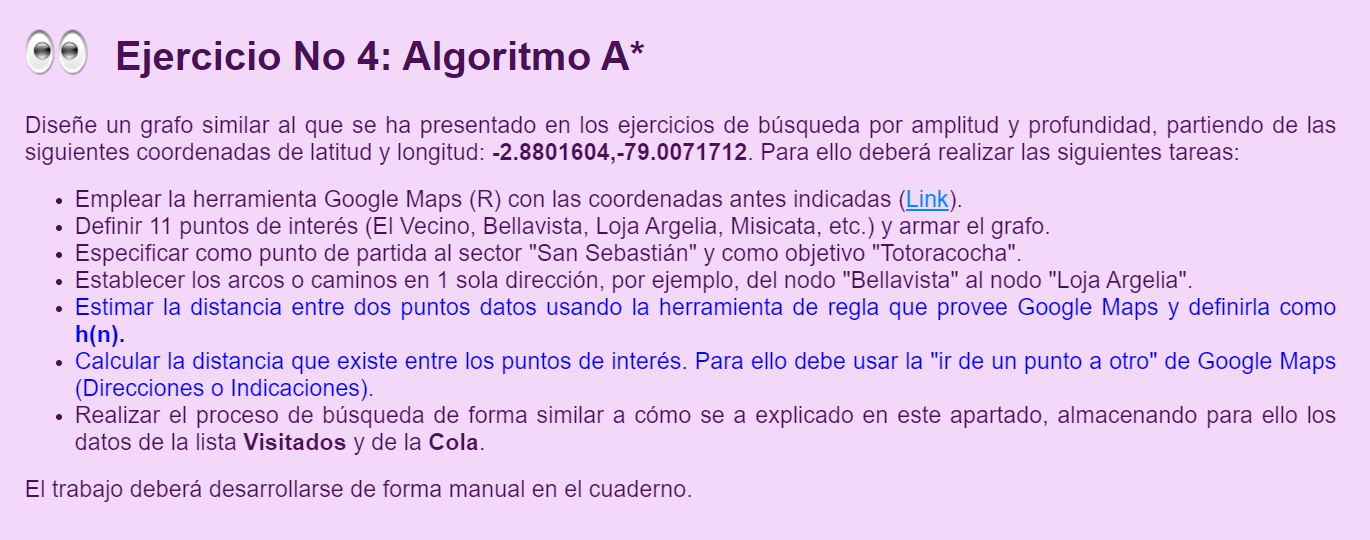

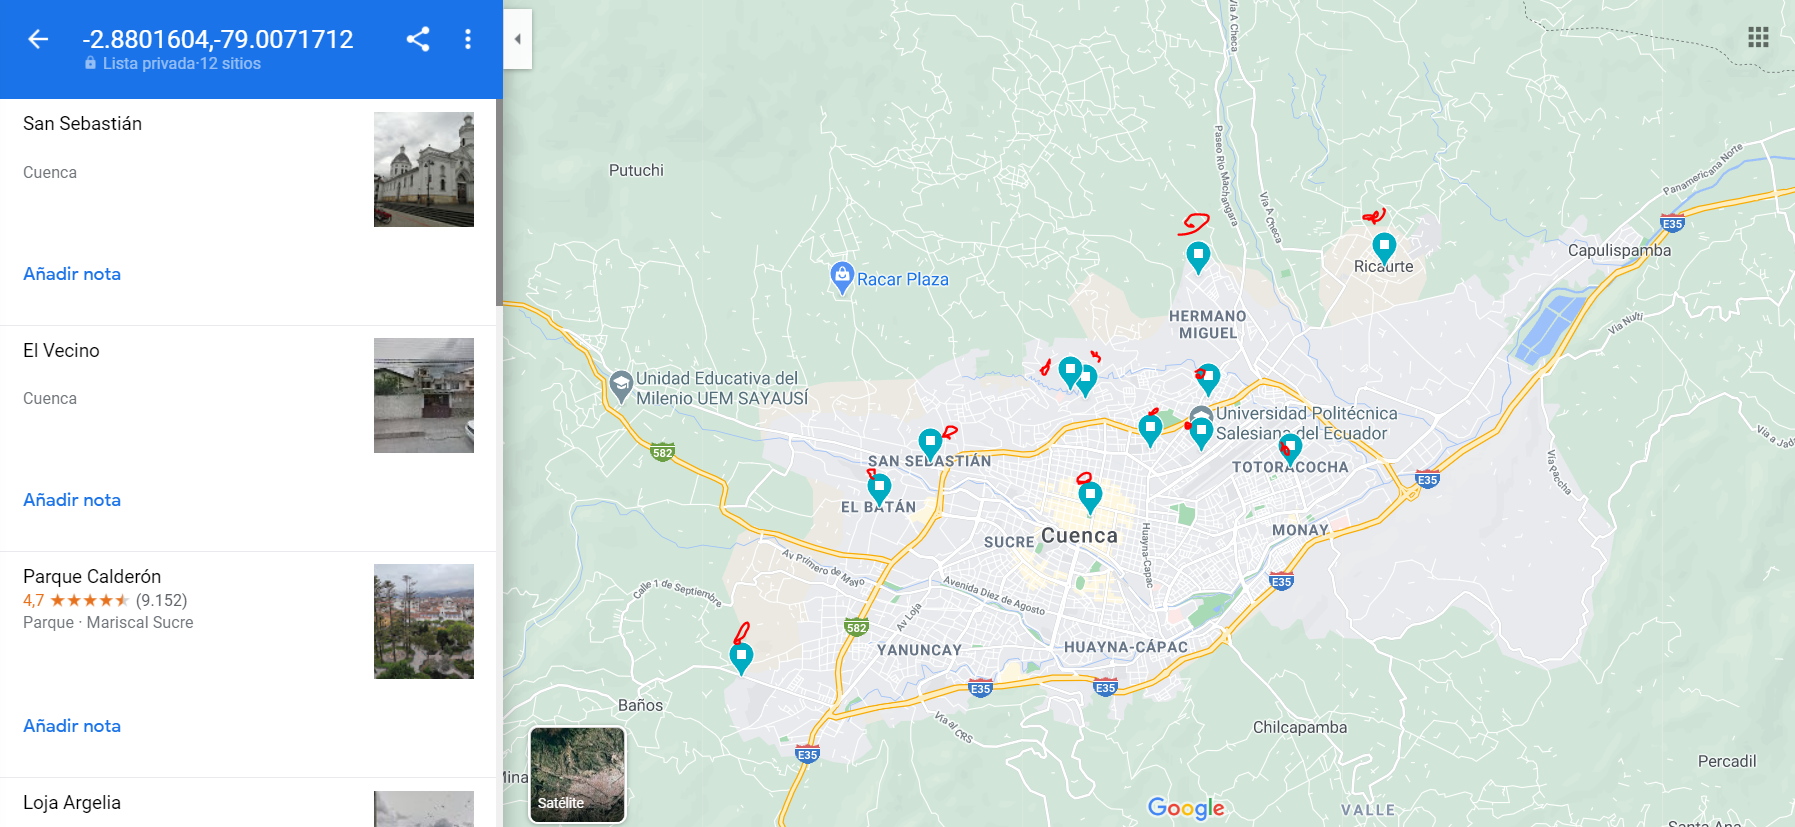

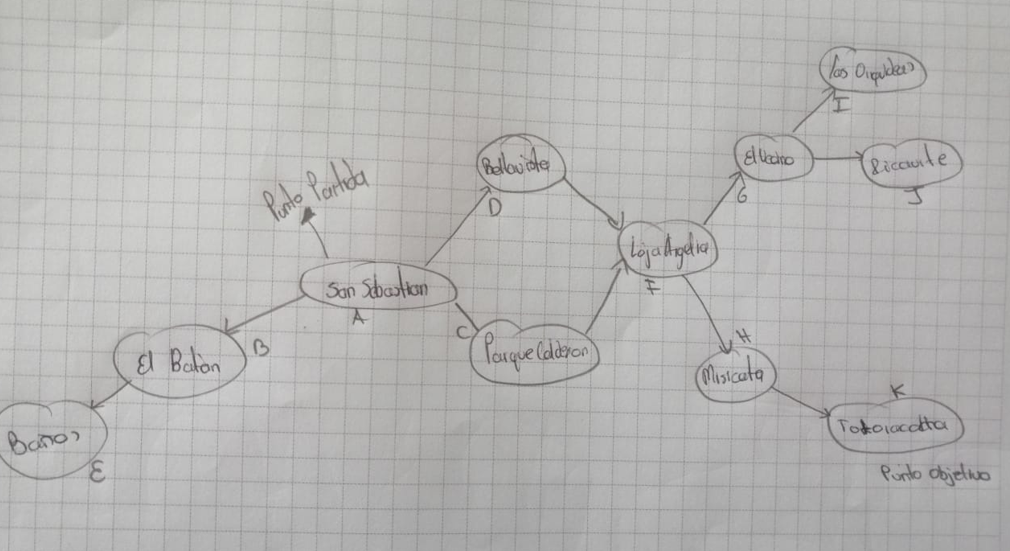

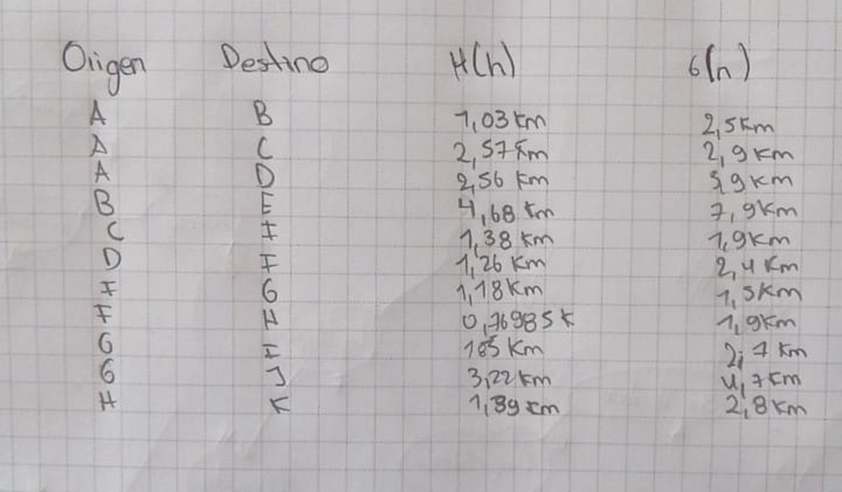

In [1]:
from neo4j import GraphDatabase

class CLASE_NEO4J(object): 
    def __init__(self):
        self._driver = GraphDatabase.driver("bolt:neo4j://localhost:7687", auth=("neo4j", "egfa2209"), encrypted=False)
    def close(self):
        self._driver.close()
        
    def CREAR_LUGAR(self, message,lugar, latitud, longitud):
        with self._driver.session() as session:
            session.write_transaction(self._VALIDAR_LUGAR, message,lugar, latitud, longitud)
            
            
    def CREAR_RUTA(self,origen,destino,costo,hn):
        with self._driver.session() as session:
            session.write_transaction(self._VALIDAR_RUTA,origen,destino,costo,hn)
            
    #METODO PARA CREAR LOS NODOS DE LUGARES
    @staticmethod
    def _VALIDAR_LUGAR(tx, message,lugar, latitud, longitud):
        result2 = tx.run("match(l:Lugares {nombre:'"+lugar+"'}) return l.nombre").data()
       
        if int(len(result2)) == 0:
            #SE CREA EL LUGAR
            result = tx.run("CREATE("+lugar+":Lugares {nombre:'"+lugar+"' ,latitud: "+latitud+", longitud: "+longitud+"}) "
                        "SET "+lugar+".message = $message "
                        "RETURN "+lugar+".message + ', from node ' + id("+lugar+")", message=message)
       
    #CREACION LAS RELACIONES CON EL COSTE  Y HN PARA LA RUTA
    @staticmethod
    def _VALIDAR_RUTA(tx,origen,destino,costo,hn):
   
        result = tx.run("match(l1:Lugares{nombre:'"+origen+"'})-[r:RUTA_DE{costo:"+costo+",hn:"+hn+"}]->(l2:Lugares{nombre:'"+destino+"'}) return l2").data()
        if int(len(result)) == 0:

            result2 = tx.run(" match("+origen+":Lugares {nombre:'"+origen+"'}) match("+destino+":Lugares {nombre:'"+destino+"'}) create("+origen+")-[:RUTA_DE{costo:"+costo+",hn:"+hn+"}]->("+destino+")")
            
grafo=CLASE_NEO4J()

In [2]:
#SE CREA LA LISTA DE NODOS LUGARES 
listaL = (["El_Vecino", -2.88112, -78.9882], 
          ["Bellavista", -2.88129, -79.00516], 
          ["Loja_Argelia", -2.88817, -78.99612], 
          ["Misicata", -2.88866, -78.98923], 
          ["San_Sebastian", -2.89008, -79.02636], 
          ["Totoracocha", -2.89082, -78.97689], 
          ["Ricaurte", -2.86347, -78.96523], 
          ["Baños", -2.92317, -79.06591], 
          ["Parque_Calderon", -2.89741, -79.00448], 
          ["Las_Orquideas", -2.86452, -78.98954], 
          ["El_Batan", -2.89628, -79.03342])

for ll in listaL:
    #SE INICIA EL METODO DE GENERAR LUGARES
    grafo.CREAR_LUGAR("__",str(ll[0]), str(ll[1]), str(ll[2]))
 

In [3]:
# SE GENERA LAS RELACIONES DE LOS LUGARES
#SE CREA LA LISTA DE LAS RELACIONES Y LOS NODOS
listaL = (["San_Sebastian", "El_Batan", 1.03, 2.5],
          ["San_Sebastian", "Parque_Calderon", 2.57, 2.9],
          ["San_Sebastian", "Bellavista", 2.56, 3.9],
          ["El_Batan", "Baños", 4.68, 7.9],
          ["Parque_Calderon", "Loja_Argelia", 1.38, 1.9],
          ["Bellavista", "Loja_Argelia", 1.26, 2.4],
          ["Loja_Argelia", "El_Vecino", 1.18, 1.5],
          ["Loja_Argelia", "Misicata", 0.76985, 1.9],
          ["El_Vecino", "Las_Orquideas", 1.85, 2.7],
          ["El_Vecino", "Ricaurte", 3.22, 4.7],
          ["Misicata", "Totoracocha", 1.39, 2.8])
         
for lis in listaL:
    #SE INICIA EL METODO DE GENERAR RUTAS
    grafo.CREAR_RUTA(str(lis[0]),str(lis[1]),str(lis[2]),str(lis[3]))

## Arbol de Nodos

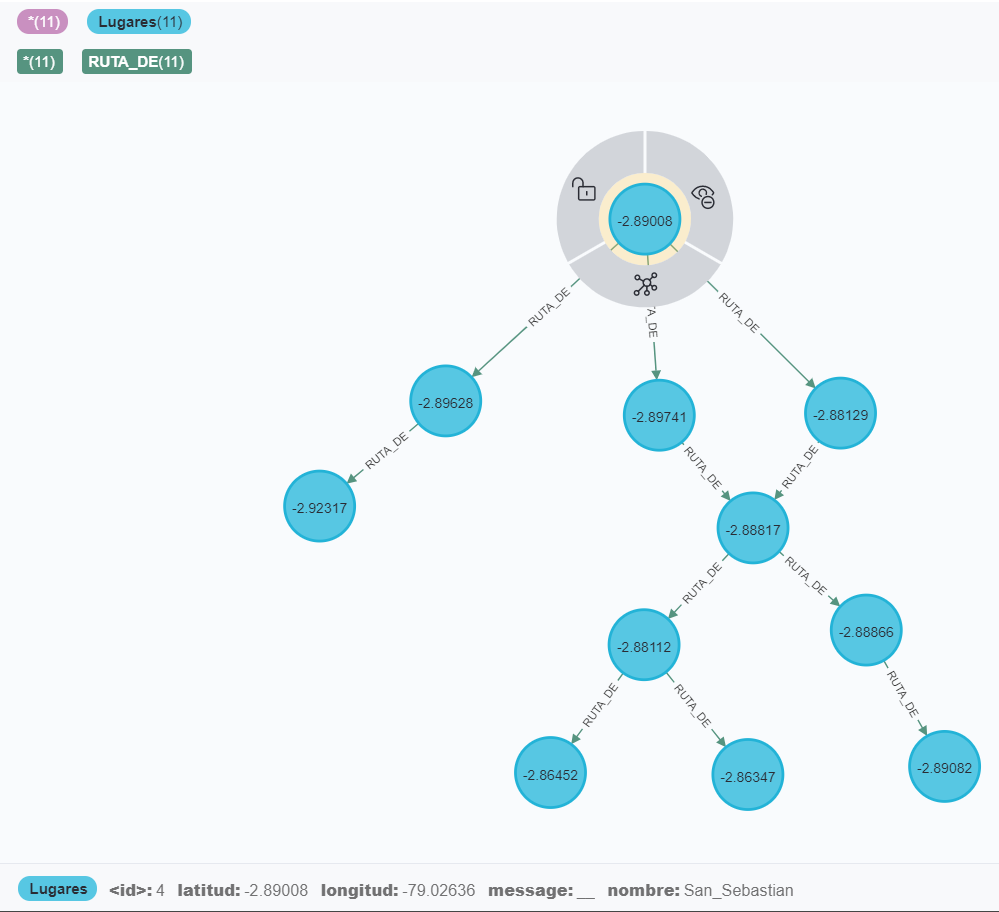